# Predicting Default Risk

# Project Overview

<p>You are a loan officer at a young and small bank (been in operations for two years) that needs to come up with an efficient solution to classify new customers on whether they can be approved for a loan or not. You'll use a series of classification models to figure out the best model and provide a list of creditworthy customers to your manager.</p>

### How Do I Complete this Project?

To complete this project:

- Learn and understand abound classification models
- Apply the skills you've learned.

### Skills Required

In order to complete this project, you must be able to:

- ***Cleanup, format, and blend a wide range of data sources***
- Build predictive classification models using ***Logistic Regression, Decision Tree, Random Forest, and Boosted Model***



# The Business Problem

<p>You work for a small bank and are responsible for determining if customers are creditworthy to give a loan to. Your team typically gets 200 loan applications per week and approves them by hand.</p>

<p>Due to a financial scandal that hit a competitive bank last week, you suddenly have an influx of new people applying for loans for your bank instead of the other bank in your city. All of a sudden you have nearly 500 loan applications to process this week!</p>

<p>Your manager sees this new influx as a great opportunity and wants you to figure out how to process all of these loan applications within one week.</p>

<p>Fortunately for you, you just completed a course in classification modeling and know how to systematically evaluate the creditworthiness of these new loan applicants.</p>

<p>For this project, you will analyze the business problem using the Problem Solving Framework and provide a list of creditworthy customers to your manager in the next two days.</p>

You have the following information to work with:
- Data on all past applications
- The list of customers that need to be processed in the next few days


# Steps to Success

## Step 1: Business and Data Understanding

Your project should include a description of the key business decisions that need to be made.


# Step 2: Explore and Cleanup the Data

To properly build the model, and select predictor variables, you need to explore and cleanup your data.

Here are some guidelines to help you clean up the data:
- Are any of your numerical data fields highly-correlated with each other? The correlation should be at least .70 to be considered “high”.
- Are there any missing data for each of the data fields? Fields with a lot of missing data should be removed
- Are there only a few values in a subset of your data field? Does the data field look very uniform (there is only one value for the entire field?). This is called “low variability” and you should remove fields that have low variability. Refer to the "Tips" section to find examples of data fields with low-variability.
- Your clean data set should have 13 columns where the Average of Age Years should be 36 (rounded up)

Note: If you decide to impute any data field, for the sake of consistency in the data cleanup process, impute the data using the median of the entire data field.

# Step 3. Train your Classification Models

You should choose 70% to create the Estimation set and 30% to create the Validation set. Set the Random Seed to 1 if you're using Alteryx.

Train your dataset using these models:
- Logistic Regression
- Decision Tree
- Forest Model
- Boosted Tree

## Step 4. Writeup

Compare all of the models’ performance against each other. Decide on the best model and score your new customers.

***Important:*** Your manager only cares about how accurate you can identify people who qualify and do not qualify for loans for this problem.

Write a brief report on how you came up with your classification model and write down how many of the new customers would qualify for a loan.

### Import useful libraries

In [1]:
# import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,  LabelBinarizer, MinMaxScaler
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix, plot_roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
#import statsmodels.api as sm
from sklearn.pipeline import Pipeline

### Explore and clean up the data

In [2]:
# Load the dataset
train_df = pd.read_excel('data/credit-data-training.xlsx')
test_df = pd.read_excel('data/customers-to-score.xlsx')

In [3]:
# Expalore the dataset
train_df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [4]:
# Check the rows and columns
train_df.shape

(500, 20)

We have 500 rows and 20 columns. Now let's check the missing data.

In [5]:
# Statistical summary of categorical variables
train_df.describe(include='object')

,Credit-Application-Result,Account-Balance,Payment-Status-of-Previous-Credit,Purpose,Value-Savings-Stocks,Length-of-current-employment,Guarantors,Concurrent-Credits,No-of-Credits-at-this-Bank
count,500,500,500,500,500,500,500,500,500
unique,2,2,3,4,3,3,2,1,2
top,Creditworthy,No Account,Paid Up,Home Related,None,< 1yr,None,Other Banks/Depts,1
freq,358,262,260,355,298,279,457,500,320


In [6]:
# Statistical summary of Numerical variables
train_df.describe(exclude='object')

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.00000,500.000000,500.000000,156.000000,500.000000,488.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,21.43400,3199.980000,3.010000,2.660256,2.360000,35.637295,1.928000,1.0,1.14600,1.400000,1.038000
std,12.30742,2831.386861,1.113724,1.150017,1.064268,11.501522,0.539814,0.0,0.35346,0.490389,0.191388
min,4.00000,276.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,12.00000,1357.250000,2.000000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,18.00000,2236.500000,3.000000,2.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,24.00000,3941.500000,4.000000,4.000000,3.000000,42.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,60.00000,18424.000000,4.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


### Let's check missing data values

In [7]:
# check missing values
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data[missing_data['Total']>0]

,Total,%
Duration-in-Current-address,344,68.8
Age-years,12,2.4


As we can see in the above observation that the `Duration-in-Current-address` has missing 344(68.8%) out of 500 records and `Age-years` has missing 12(2.4%) out of 500 records. The `Duration-in-Current-address` variable missing almost 69 percent of our data and probably our model will not have changes if we drop this variable. But we impute the `Age-years` variable by comparing mean and median values.

In [8]:
# Let's print the mean and median of Age-years
mean_age = train_df['Age-years'].mean()
median_age = train_df['Age-years'].median()

print("The mean of Age-years:", mean_age)
print("The median of Age-years:", median_age)

The mean of Age-years: 35.63729508196721
The median of Age-years: 33.0


Therefore, we will impute the missing values of `Age-years` variable with median because mean will have an outlier.

In [9]:
# We impute the missing values of age-years with median as a strategy
imp = SimpleImputer(missing_values=np.nan, strategy='median')
age_t = train_df['Age-years'].values
train_df['Age-years'] = imp.fit_transform(age_t.reshape(-1, 1))

In [10]:
# Drop the Duration-in-Current-address variable
train_df.drop(columns='Duration-in-Current-address', axis=1, inplace=True)

# let's plot the distribution of the categorical variables.

In [11]:
categorical = [
    'Account-Balance',
    'Payment-Status-of-Previous-Credit',
    'Purpose',
    'Value-Savings-Stocks',
    'Length-of-current-employment',
    'No-of-Credits-at-this-Bank',
    'Guarantors',
    'Concurrent-Credits'
    
]
numerical = [
    'Duration-of-Credit-Month',
    'Credit-Amount',
    'Instalment-per-cent',
    'Most-valuable-available-asset',
    'Age-years',
    'Type-of-apartment',
    'Occupation',
    'No-of-dependents',
    'Telephone',
    'Foreign-Worker'
]


Text(0.5, 1.0, 'Distribution of Categorical Variables')

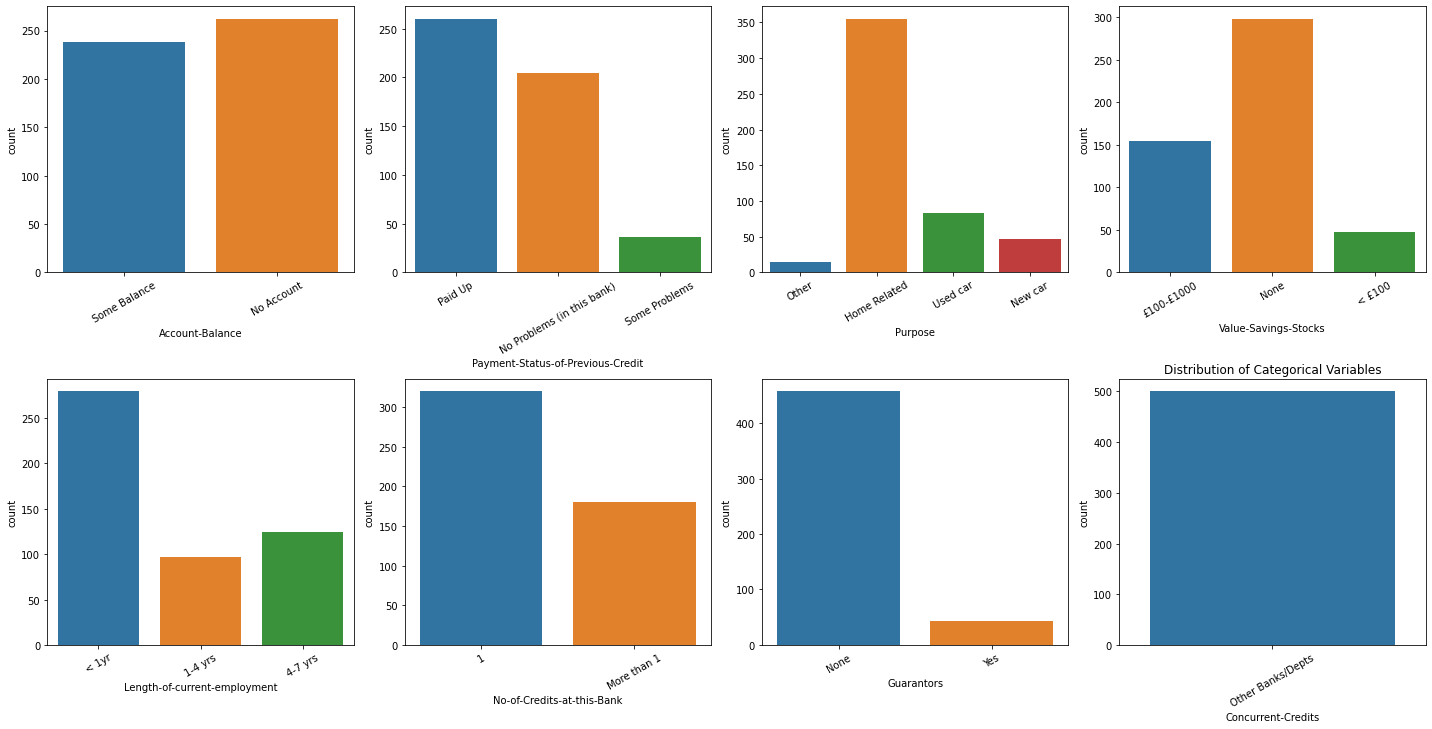

In [12]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=train_df[variable], ax=subplot)
    plt.tight_layout()
    for label in subplot.get_xticklabels():
        label.set_rotation(30)
plt.title("Distribution of Categorical Variables")


We have 8 categorical variables and the distribution of the varibales are visualized in the above distribution plot. From the above plot we can see that `Guarantors` has skewed more data points to None category and `Concurrent-credits` varibale also has one category. These variables will not have significant changes to our model. Therefore, we will drop them.

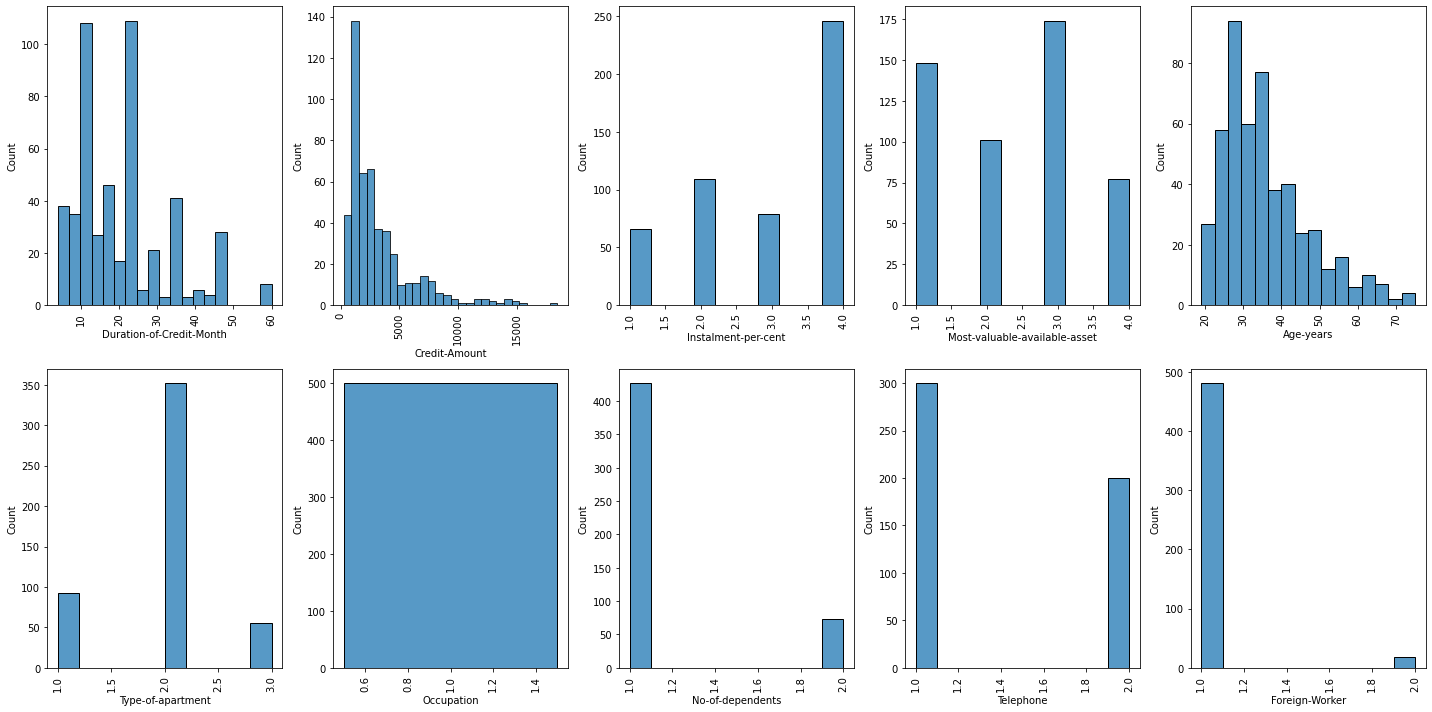

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.histplot(train_df[variable], ax=subplot,  )
    plt.tight_layout()
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


We can also understand that the distributions of numerical variables above. From this, `Occupation` has one data value, `No-of-dependents`, and `Foreign-Worker`  has low variability and `Telephone` also not important. We will drop these variables because they will not have statistically significant value to our model.

# Select Predictors and separate the target variable
The target variable is `Credit-Application-Result`
Therefore, based on the above analysis I will select the predictors and separate the target variable.

In [14]:
# select the target variable
y = train_df['Credit-Application-Result']
# then drop it from the train_df
#train_df.drop(columns=['Credit-Application-Result', 
 #                      'Telephone', 'Foreign-Worker',
 #                      'Occupation','No-of-dependents',
 #                      'Guarantors','Concurrent-Credits'], axis=1, inplace=True)

In [15]:
# encoding Purpose to numeric
train_df['Purpose']=train_df['Purpose'].astype("category")
train_df['Purpose']=train_df['Purpose'].cat.codes

In [16]:
# list of  categorical variables
cat_features = [
    'Account-Balance',
    'Payment-Status-of-Previous-Credit',
    'Value-Savings-Stocks',
    'Length-of-current-employment',
    'No-of-Credits-at-this-Bank'
]
# list of numerical variables
num_features = [
    'Duration-of-Credit-Month',
    'Credit-Amount',
    'Instalment-per-cent',
    'Purpose',
    'Most-valuable-available-asset',
    'Age-years',
    'Type-of-apartment'
]


In [17]:
data = pd.DataFrame((cat_features + num_features), columns={'Fields'})
data

,Fields
0,Account-Balance
1,Payment-Status-of-Previous-Credit
2,Value-Savings-Stocks
3,Length-of-current-employment
4,No-of-Credits-at-this-Bank
5,Duration-of-Credit-Month
6,Credit-Amount
7,Instalment-per-cent
8,Purpose
9,Most-valuable-available-asset


I have selected 12 (6 categorical and 6 numerical) variables as predictor variables and `Credit-Application-Result` as a target variable. And then I have trasformed the categorical variables to numerical using `LabelEncoder` because the machine learning model could not train the categorical variables.

In [18]:
# encoding categorical varibles using LabelEncoder
#cat_cols = train_df[cat_features].apply(LabelEncoder().fit_transform)

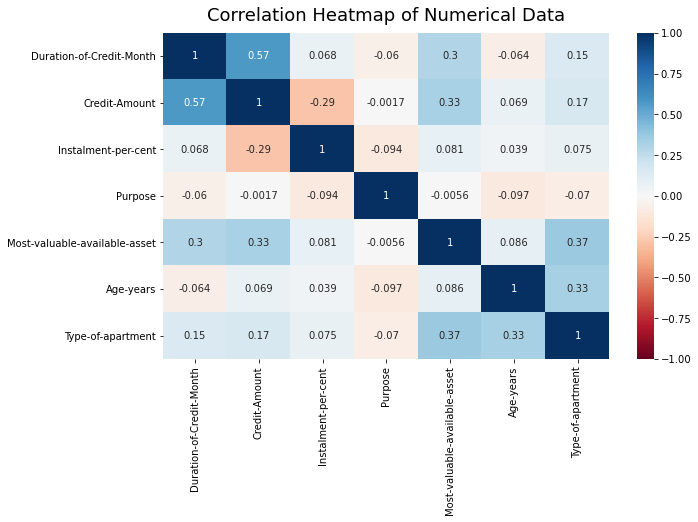

In [19]:
plt.figure(figsize=(10,6))
features = train_df[cat_features + num_features]

heatmap = sns.heatmap(features.corr(), vmin=-1, vmax=1, annot=True, center=0, cmap='RdBu')
heatmap.set_title('Correlation Heatmap of Numerical Data', fontdict={'fontsize':18}, pad=12);# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

`Credit-Amount` and `Duration-of-Credit-Month` are correlated each other but not severaly correlated(positively correlated) and the remaining variables have no strong correlation with each other.

Once transformed the categorical variables encoding them using the `OneHotEncoder` to make sense our training dataset.

In [20]:
# Preprocessing Data for Models
transformer = ColumnTransformer(
    [
        ('scaler' , StandardScaler(), num_features),
        ('encoder', OneHotEncoder(drop='first'), cat_features)
    ], 
    remainder='drop'
)

In [21]:
# Convert to nummeric
cat_var = pd.get_dummies(train_df[cat_features], drop_first=True)

In [22]:
# Concat to numerical varibles and train the model
X_train = pd.concat([train_df[num_features], cat_var], axis=1)

In [23]:
X_train.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Purpose,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_More than 1
0,4,1494,1,2,1,33.0,2,1,1,0,0,1,0,1,0
1,4,1494,1,0,1,29.0,2,1,1,0,0,1,0,1,0
2,4,1544,2,0,1,42.0,2,1,0,0,1,0,0,0,1
3,4,3380,1,0,1,37.0,2,1,0,0,1,0,0,0,0
4,6,343,4,0,1,27.0,2,0,1,0,1,0,0,1,0


#### The next step is normalizing the train dataset using `MinMaxScaler`.

In [24]:
# Get column names first
col_names = X_train.columns
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=col_names)

In [25]:
X_train.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Purpose,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_More than 1
0,0.000000,0.067115,0.000000,0.666667,0.0,0.250000,0.5,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.000000,0.067115,0.000000,0.000000,0.0,0.178571,0.5,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.000000,0.069870,0.333333,0.000000,0.0,0.410714,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.000000,0.171038,0.000000,0.000000,0.0,0.321429,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.035714,0.003692,1.000000,0.000000,0.0,0.142857,0.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Now our train dataset is normalized and scaled in the range of min and max values.

<AxesSubplot:>

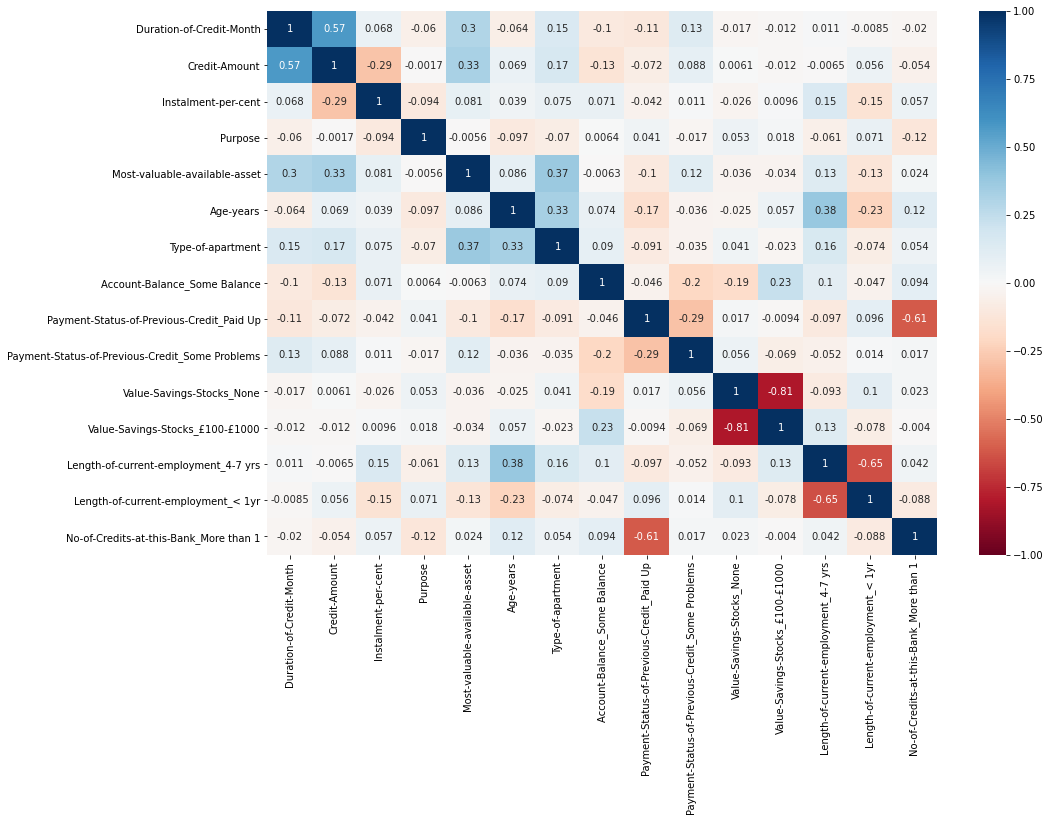

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot = True,cmap="RdBu", center=0, vmin=-1, vmax=1)

# Train and validate the model

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Split into train/test sets
train_X, test_X, train_y, test_y = train_test_split(X_train, y, test_size=0.3, random_state=1)

## Train the model using Logistic Regression

In [32]:
lreg = LogisticRegression(solver='liblinear')

In [33]:
lreg.fit(train_X, train_y)
y_pred = lreg.predict(test_X)

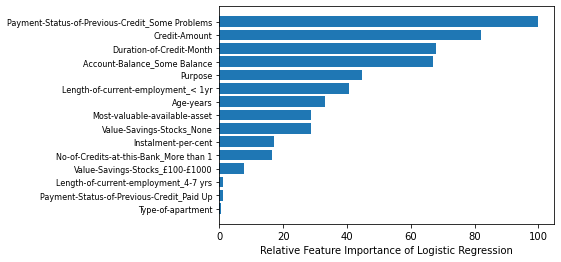

In [34]:
feature_importance = abs(lreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(train_X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance of Logistic Regression')
plt.savefig('images/lr_importance.png', dpi=300, bbox_inches='tight')

### Confusion Matrix

A confusion matrix is formed from the four outcomes produced as a result of binary classification.
- True Positive(TP)
- True Negative(TN)
- False Positive(FP)
- False Negative(FN)

<AxesSubplot:>

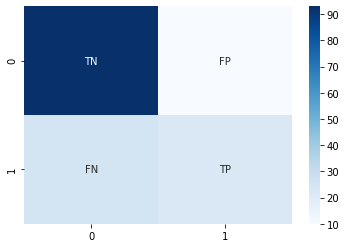

In [46]:
labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(test_y, y_pred), annot=labels, fmt='', cmap='Blues')

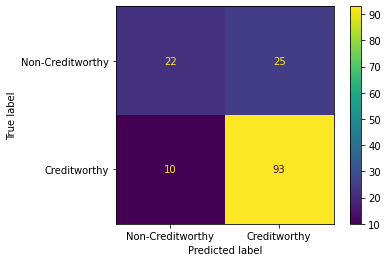

In [50]:
print(plot_confusion_matrix(lreg,test_X, test_y, labels=['Non-Creditworthy', 'Creditworthy']))
plt.savefig('images/lr_mat.png', dpi=300, bbox_inches='tight')

In [53]:
print(classification_report(test_y, y_pred))

                  precision    recall  f1-score   support

    Creditworthy       0.79      0.90      0.84       103
Non-Creditworthy       0.69      0.47      0.56        47

        accuracy                           0.77       150
       macro avg       0.74      0.69      0.70       150
    weighted avg       0.76      0.77      0.75       150



### Extracting TP, TN, FP, FN

In [52]:
tp, fp, fn, tn= confusion_matrix(test_y, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  22
False Positives:  10
False Negatives:  25
True Positives:  93


### The percentage accuracy of the model
The percentange accuracy of the model is calculated from the confusion matrix that is the percentage of `(TN + TP) * 100 / (TN + TP + FN + FP))`

In [66]:
# Accuracy
lr_acc = round((tn+tp)/(tp+tn+fp+fn), 2)
lr_creditworthy=round(tp/(tp+fp), 2)
lr_NonCreditworthy=round(tn/(tn+fn), 2)
print("The percentage Accuracy of Logistic Regression is {:0.2f}%".format(lr_acc))
lr_creditworthy, lr_NonCreditworthy

The percentage Accuracy of Logistic Regression is 0.77%


(0.9, 0.47)

## 2. Using RandomForestClassifier

The dataset is already cleaned, formatted, splitted and ready for prediction, then I am going to validate and evaluate the test dataset using RandomForestClassifier.

In [39]:
# define the model
rfc = RandomForestClassifier(n_estimators = 500, max_features = 13, min_samples_leaf = 6, min_samples_split=3)
# train the model / fit the train dataset
rfc.fit(train_X, train_y)

RandomForestClassifier(max_features=13, min_samples_leaf=6, min_samples_split=3,
                       n_estimators=500)

In [37]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    
    'max_features': range(2, 13),
    'min_samples_leaf': range(2, 8),
    'min_samples_split': range(2, 12),
    'n_estimators': [100, 200, 300, 400, 500]
}# Create a based model
# Instantiate the grid search model
rfc_grid = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
rfc_grid.fit(train_X, train_y)

Fitting 5 folds for each of 3300 candidates, totalling 16500 fits


In [ ]:
# identify the best estimator
rfc_grid.best_estimator_

In [ ]:
rfc_grid.best_estimator_.feature_importances_

Variables importance chart below

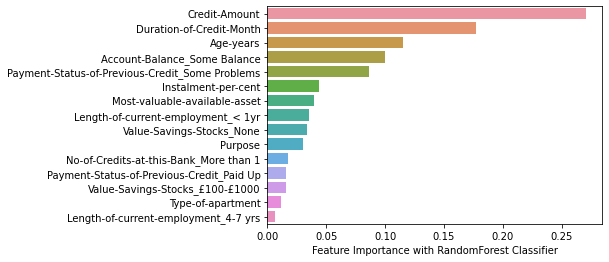

In [40]:
df_feature_importance = pd.DataFrame(rfc.feature_importances_, 
                                     index=train_X.columns, 
                                     columns=['feature importance']).sort_values('feature importance', 
                                                                                 ascending=False)
ax = sns.barplot(x='feature importance', y=df_feature_importance.index, data=df_feature_importance)
ax.set_xlabel('Feature Importance with RandomForest Classifier')
plt.savefig("images/rf_features.png", dpi=300, bbox_inches='tight')

### Confusion matrix

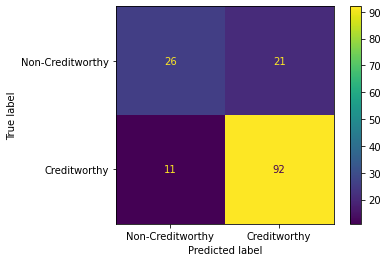

In [70]:
print(plot_confusion_matrix(rfc, test_X, test_y, labels=['Non-Creditworthy', 'Creditworthy']))
plt.savefig("images/rf_matrix.png", dpi=300, bbox_inches='tight')

In [71]:
rfc_pred = rfc.predict(test_X)

In [72]:
print(classification_report(test_y, rfc_pred))

                  precision    recall  f1-score   support

    Creditworthy       0.81      0.89      0.85       103
Non-Creditworthy       0.70      0.55      0.62        47

        accuracy                           0.79       150
       macro avg       0.76      0.72      0.74       150
    weighted avg       0.78      0.79      0.78       150



In [73]:
tp, fp, fn, tn= confusion_matrix(test_y, rfc_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  26
False Positives:  11
False Negatives:  21
True Positives:  92


In [74]:
# Accuracy
rfc_acc = round((tn+tp)/(tp+tn+fp+fn), 2)
rfc_creditworthy=round(tp/(tp+fp), 2)
rfc_NonCreditworthy=round(tn/(tn+fn), 2)
print("The percentage Accuracy of Logistic Regression is {:0.2f}%".format(rfc_acc))
rfc_creditworthy, rfc_NonCreditworthy

The percentage Accuracy of Logistic Regression is 0.79%


(0.89, 0.55)

## 3. Using DecisionTreeClassifier

In [75]:
# define the model
dtc = DecisionTreeClassifier(max_depth=3, criterion='entropy')
# fiting the model
dtc.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [76]:
# predict the y
dtc_pred = dtc.predict(test_X)

In [77]:
from sklearn import tree

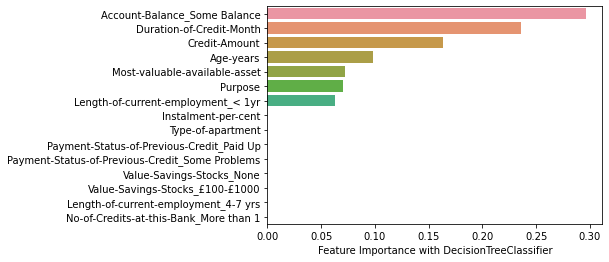

In [78]:
df_feature_importance = pd.DataFrame(dtc.feature_importances_, 
                                     index=train_X.columns, 
                                     columns=['feature importance']).sort_values('feature importance', 
                                                                                 ascending=False)
ax = sns.barplot(x='feature importance', y=df_feature_importance.index, data=df_feature_importance)
ax.set_xlabel('Feature Importance with DecisionTreeClassifier')
plt.savefig("images/dtc_features.png", dpi=300, bbox_inches='tight')

### Confusion Matrix

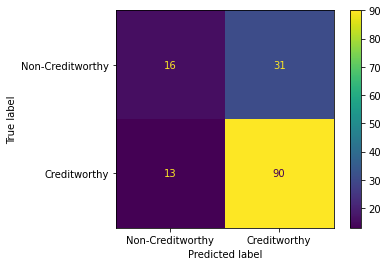

In [80]:
print(plot_confusion_matrix(dtc, test_X, test_y, labels=['Non-Creditworthy', 'Creditworthy']))
plt.savefig("images/dt_matrix.png", dpi=300, bbox_inches='tight')

In [81]:
print(classification_report(test_y, dtc_pred))

                  precision    recall  f1-score   support

    Creditworthy       0.74      0.87      0.80       103
Non-Creditworthy       0.55      0.34      0.42        47

        accuracy                           0.71       150
       macro avg       0.65      0.61      0.61       150
    weighted avg       0.68      0.71      0.68       150



In [82]:
tp, fp, fn, tn= confusion_matrix(test_y, dtc_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  16
False Positives:  13
False Negatives:  31
True Positives:  90


In [83]:
# Accuracy
dtc_acc = round((tn+tp)/(tp+tn+fp+fn), 2)
dtc_creditworthy=round(tp/(tp+fp), 2)
dtc_NonCreditworthy=round(tn/(tn+fn), 2)
print("The percentage Accuracy of Logistic Regression is {:0.2f}%".format(dtc_acc))
dtc_creditworthy, dtc_NonCreditworthy

The percentage Accuracy of Logistic Regression is 0.71%


(0.87, 0.34)

## 4. Using GradientBoosting

In [84]:
# define the model with tunning parameters
gbc = GradientBoostingClassifier(n_estimators=100,
    max_depth=3,
    learning_rate=1.0
)

# traint the model
gbc.fit(train_X, train_y)

GradientBoostingClassifier(learning_rate=1.0)

In [85]:
gbc_pred = gbc.predict(test_X)

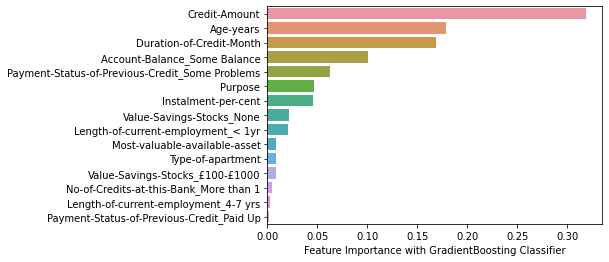

In [86]:
df_feature_importance = pd.DataFrame(gbc.feature_importances_, 
                                     index=train_X.columns, 
                                     columns=['feature importance']).sort_values('feature importance', 
                                                                                 ascending=False)
ax = sns.barplot(x='feature importance', y=df_feature_importance.index, data=df_feature_importance)
ax.set_xlabel('Feature Importance with GradientBoosting Classifier')
plt.savefig('images/gbc_features.png', dpi=300, bbox_inches='tight')

### Confusion matrix

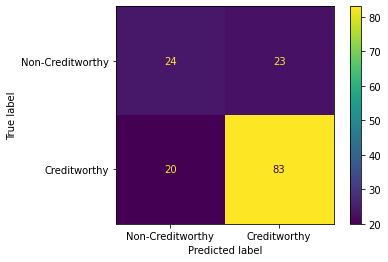

In [170]:
print(plot_confusion_matrix(gbc, test_X, test_y, labels=['Non-Creditworthy', 'Creditworthy']))
plt.savefig('images/gbc_report.png', dpi=300, bbox_inches='tight')

In [88]:
print(classification_report(test_y, gbc_pred))

                  precision    recall  f1-score   support

    Creditworthy       0.78      0.81      0.79       103
Non-Creditworthy       0.55      0.51      0.53        47

        accuracy                           0.71       150
       macro avg       0.66      0.66      0.66       150
    weighted avg       0.71      0.71      0.71       150



In [89]:
# optional: get true negative (tn), false positive (fp)
# false negative (fn) and true positive (tp) from confusion matrix
M = confusion_matrix(y_pred, test_y)
tn, fp, fn, tp = M.ravel() 

In [90]:
tn, fn, fp, tn

(93, 10, 25, 93)

#### optional: get true negative (tn), false positive (fp)
#### false negative (fn) and true positive (tp) from confusion matrix

In [91]:
tp, fp, fn, tn= confusion_matrix(test_y, gbc_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  24
False Positives:  20
False Negatives:  23
True Positives:  83


In [168]:
# Accuracy
gbc_acc = round((tn+tp)/(tp+tn+fp+fn), 2)
gbc_creditworthy=round(tp/(tp+fp), 2)
gbc_NonCreditworthy=round(tn/(tn+fn), 2)
print("The percentage Accuracy of Logistic Regression is {:0.2f}%".format(gbc_acc))
gbc_creditworthy, gbc_NonCreditworthy

The percentage Accuracy of Logistic Regression is 0.71%


(0.81, 0.51)

## ROC AND AUC GRAPH for MODEL COMPARISON

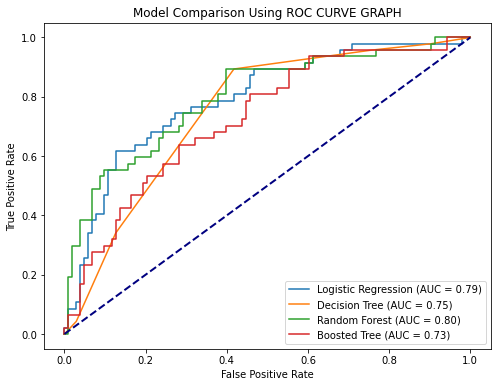

In [166]:
fig, ax = plt.subplots(figsize=(8, 6))

models = [
    ("Logistic Regression", lreg),
    ("Decision Tree", dtc),
    ("Random Forest", rfc),
    ("Boosted Tree", gbc)
]
model_displays = {}
for name, pipeline in models:
    model_displays[name] = plot_roc_curve(
        pipeline, test_X, test_y, ax=ax, name=name)
_ = ax.set_title("Model Comparison Using ROC CURVE GRAPH")
_=ax.set_ylabel('True Positive Rate')
_=ax.set_xlabel("False Positive Rate")
_=ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.savefig("images/roc.png", dpi=300, bbox_inches='tight')

In [121]:
from pandas.plotting import table

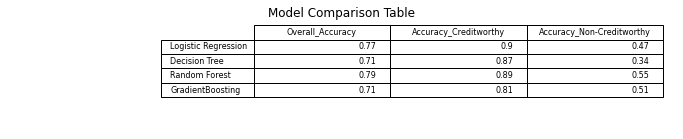

In [141]:
model_accuracy = {'Overall_Accuracy':[lr_acc, dtc_acc, rfc_acc, gbc_acc],
                 'Accuracy_Creditworthy':[lr_creditworthy, dtc_creditworthy, rfc_creditworthy, gbc_creditworthy],
                 'Accuracy_Non-Creditworthy':[lr_NonCreditworthy, dtc_NonCreditworthy, rfc_NonCreditworthy, gbc_NonCreditworthy]}
mc_df = pd.DataFrame(model_accuracy, index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'GradientBoosting'])

fig,ax = plt.subplots(figsize=(12,2)) # no visible frame
ax.set_frame_on(False)
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
mc_table = table(ax, mc_df, loc='upper right', colWidths=[0.17]*len(mc_df.columns)) # where df is your data frame
mc_table.set_fontsize(12) # if ++fontsize is necessary ++colWidths
mc_table.scale(1.2, 1.2) # change size table
plt.title("Model Comparison Table")
plt.savefig('images/mc.png', dpi=300, bbox_inches='tight', transparent=True)

# Scoring the test dataset

In [94]:
test_df.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
1,No Account,12,No Problems (in this bank),Home Related,2122,None,< 1yr,3,None,2,1,39,Other Banks/Depts,1,More than 1,1,2,1,2
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,None,4,4,23,Other Banks/Depts,1,1,1,1,1,1
3,No Account,11,No Problems (in this bank),Home Related,3905,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
4,No Account,6,No Problems (in this bank),Home Related,1957,None,1-4 yrs,1,None,4,3,31,Other Banks/Depts,2,1,1,1,1,1


In [95]:
# checking missing data point
test_df.isnull().sum()

Account-Balance                      0
Duration-of-Credit-Month             0
Payment-Status-of-Previous-Credit    0
Purpose                              0
Credit-Amount                        0
Value-Savings-Stocks                 0
Length-of-current-employment         0
Instalment-per-cent                  0
Guarantors                           0
Duration-in-Current-address          0
Most-valuable-available-asset        0
Age-years                            0
Concurrent-Credits                   0
Type-of-apartment                    0
No-of-Credits-at-this-Bank           0
Occupation                           0
No-of-dependents                     0
Telephone                            0
Foreign-Worker                       0
dtype: int64

In [96]:
# Convert to nummeric
cat_var = pd.get_dummies(test_df[cat_features], drop_first=True)

In [97]:
# endocing to numeric
test_df['Purpose']=test_df['Purpose'].astype("category")
test_df['Purpose']=test_df['Purpose'].cat.codes

In [98]:
# Concat to numerical varibles and train the model
test_data = pd.concat([test_df[num_features], cat_var], axis=1)

In [99]:
test_data.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Purpose,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_More than 1
0,9,2799,2,0,1,36,1,0,0,0,1,0,0,1,1
1,12,2122,3,0,1,39,1,0,0,0,1,0,0,1,1
2,24,3758,1,0,4,23,1,0,1,0,0,1,0,1,0
3,11,3905,2,0,1,36,1,0,0,0,1,0,0,1,1
4,6,1957,1,0,3,31,2,0,0,0,1,0,0,0,0


In [100]:
# Get column names first
col_names = test_data.columns
scaler = MinMaxScaler()
test_data_scaled = scaler.fit_transform(test_data)
test_data = pd.DataFrame(test_data_scaled, columns=col_names)

In [101]:
test_data.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Purpose,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_More than 1
0,0.073529,0.162408,0.333333,0.0,0.000000,0.296296,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.117647,0.119274,0.666667,0.0,0.000000,0.351852,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.294118,0.223511,0.000000,0.0,1.000000,0.055556,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.102941,0.232877,0.333333,0.0,0.000000,0.296296,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.029412,0.108761,0.000000,0.0,0.666667,0.203704,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [102]:
new_prediction =test_data.values

In [103]:
lr_pr = rfc.predict(new_prediction)

In [104]:
print("Prediction using Logistic Regression:")
print("Creditworthy:", (lr_pr=='Creditworthy').sum())
print("Non-Creditworthy:", (lr_pr=='Non-Creditworthy').sum())

Prediction using Logistic Regression:
Creditworthy: 418
Non-Creditworthy: 82
